# **CREDIT CARD FRAUD DETECTION**
---

## Importing Libraries

In [166]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Reading the Dataset

In [167]:
#reading the dataset
credit = pd.read_csv("C:/Users/ANURAG/Desktop/DATA ANALYTICS/Project/CREDIT CARD/creditcard.csv")


In [168]:
credit


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Data Exploration

In [169]:
cc = credit

In [170]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60521 entries, 0 to 60520
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    54999 non-null  float64
 1   V1      54999 non-null  float64
 2   V2      54999 non-null  float64
 3   V3      54999 non-null  float64
 4   V4      54999 non-null  float64
 5   V5      54999 non-null  float64
 6   V6      54999 non-null  float64
 7   V7      54999 non-null  float64
 8   V8      54999 non-null  float64
 9   V9      54999 non-null  float64
 10  V10     54999 non-null  float64
 11  V11     54999 non-null  float64
 12  V12     54999 non-null  float64
 13  V13     54999 non-null  float64
 14  V14     54999 non-null  float64
 15  V15     54999 non-null  float64
 16  V16     54999 non-null  float64
 17  V17     54999 non-null  float64
 18  V18     54999 non-null  float64
 19  V19     54999 non-null  float64
 20  V20     54999 non-null  float64
 21  V21     54999 non-null  float64
 22

In [171]:
cc.isnull().sum()

Time      5522
V1        5522
V2        5522
V3        5522
V4        5522
V5        5522
V6        5522
V7        5522
V8        5522
V9        5522
V10       5522
V11       5522
V12       5522
V13       5522
V14       5522
V15       5522
V16       5522
V17       5522
V18       5522
V19       5522
V20       5522
V21       5522
V22       5522
V23       5522
V24       5522
V25       5522
V26       5522
V27       5522
V28       5522
Amount    5522
Class     5522
dtype: int64

In [172]:
# Checking for imbalance in the dataset
cc['Class'].value_counts()

Class
0.0    54844
1.0      155
Name: count, dtype: int64

 ## Correlation Matrix

In [173]:
corr=cc.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.004760,-0.104495,-0.054735,-0.037396,-0.068731,-0.006735,-0.006158,0.038528,-0.338181,...,0.017090,0.041265,-0.000967,-0.009589,0.030312,-0.023427,-0.020027,0.000255,0.073409,-0.010793
V1,-0.004760,1.000000,-0.021332,0.282850,-0.095785,0.061158,0.104899,0.155547,-0.084341,-0.034413,...,-0.044832,-0.032301,-0.079036,-0.007878,0.173643,0.024453,-0.066608,0.092766,-0.239470,-0.202687
V2,-0.104495,-0.021332,1.000000,-0.174986,0.089243,-0.108571,0.003906,-0.046267,0.075825,-0.015524,...,-0.001005,-0.049888,-0.006147,-0.017725,-0.091732,-0.034303,0.047663,-0.064373,-0.543662,0.170926
V3,-0.054735,0.282850,-0.174986,1.000000,-0.133287,0.282971,-0.016813,0.314383,-0.256412,0.159861,...,0.001146,0.237791,0.055180,0.023014,-0.182702,0.050196,-0.116696,0.035885,-0.197388,-0.385449
V4,-0.037396,-0.095785,0.089243,-0.133287,1.000000,-0.037714,-0.054092,-0.083992,0.084472,0.008493,...,0.016789,0.015430,-0.009033,-0.006807,-0.005942,0.008312,0.055648,0.004555,0.091260,0.212610
V5,-0.068731,0.061158,-0.108571,0.282971,-0.037714,1.000000,0.064895,0.035458,-0.100102,0.066117,...,-0.071592,-0.061745,0.030903,-0.016905,-0.024456,-0.038610,-0.066114,0.041498,-0.376911,-0.197023
V6,-0.006735,0.104899,0.003906,-0.016813,-0.054092,0.064895,1.000000,0.103200,-0.048253,0.045770,...,0.036247,0.023595,-0.021887,0.008023,0.049103,0.010715,-0.015863,-0.042090,0.205886,-0.094156
V7,-0.006158,0.155547,-0.046267,0.314383,-0.083992,0.035458,0.103200,1.000000,-0.140640,0.068875,...,-0.030767,-0.018753,0.070881,-0.001842,-0.113930,-0.040214,-0.127661,-0.057042,0.356784,-0.322509
V8,0.038528,-0.084341,0.075825,-0.256412,0.084472,-0.100102,-0.048253,-0.140640,1.000000,-0.068198,...,-0.030500,0.034222,-0.028422,0.005928,0.023741,0.000803,0.029905,0.048771,-0.090752,0.155637
V9,-0.338181,-0.034413,-0.015524,0.159861,0.008493,0.066117,0.045770,0.068875,-0.068198,1.000000,...,-0.022141,0.025748,-0.037883,0.008364,0.108148,0.100278,-0.031469,-0.025621,-0.021378,-0.157985


## Heatmap

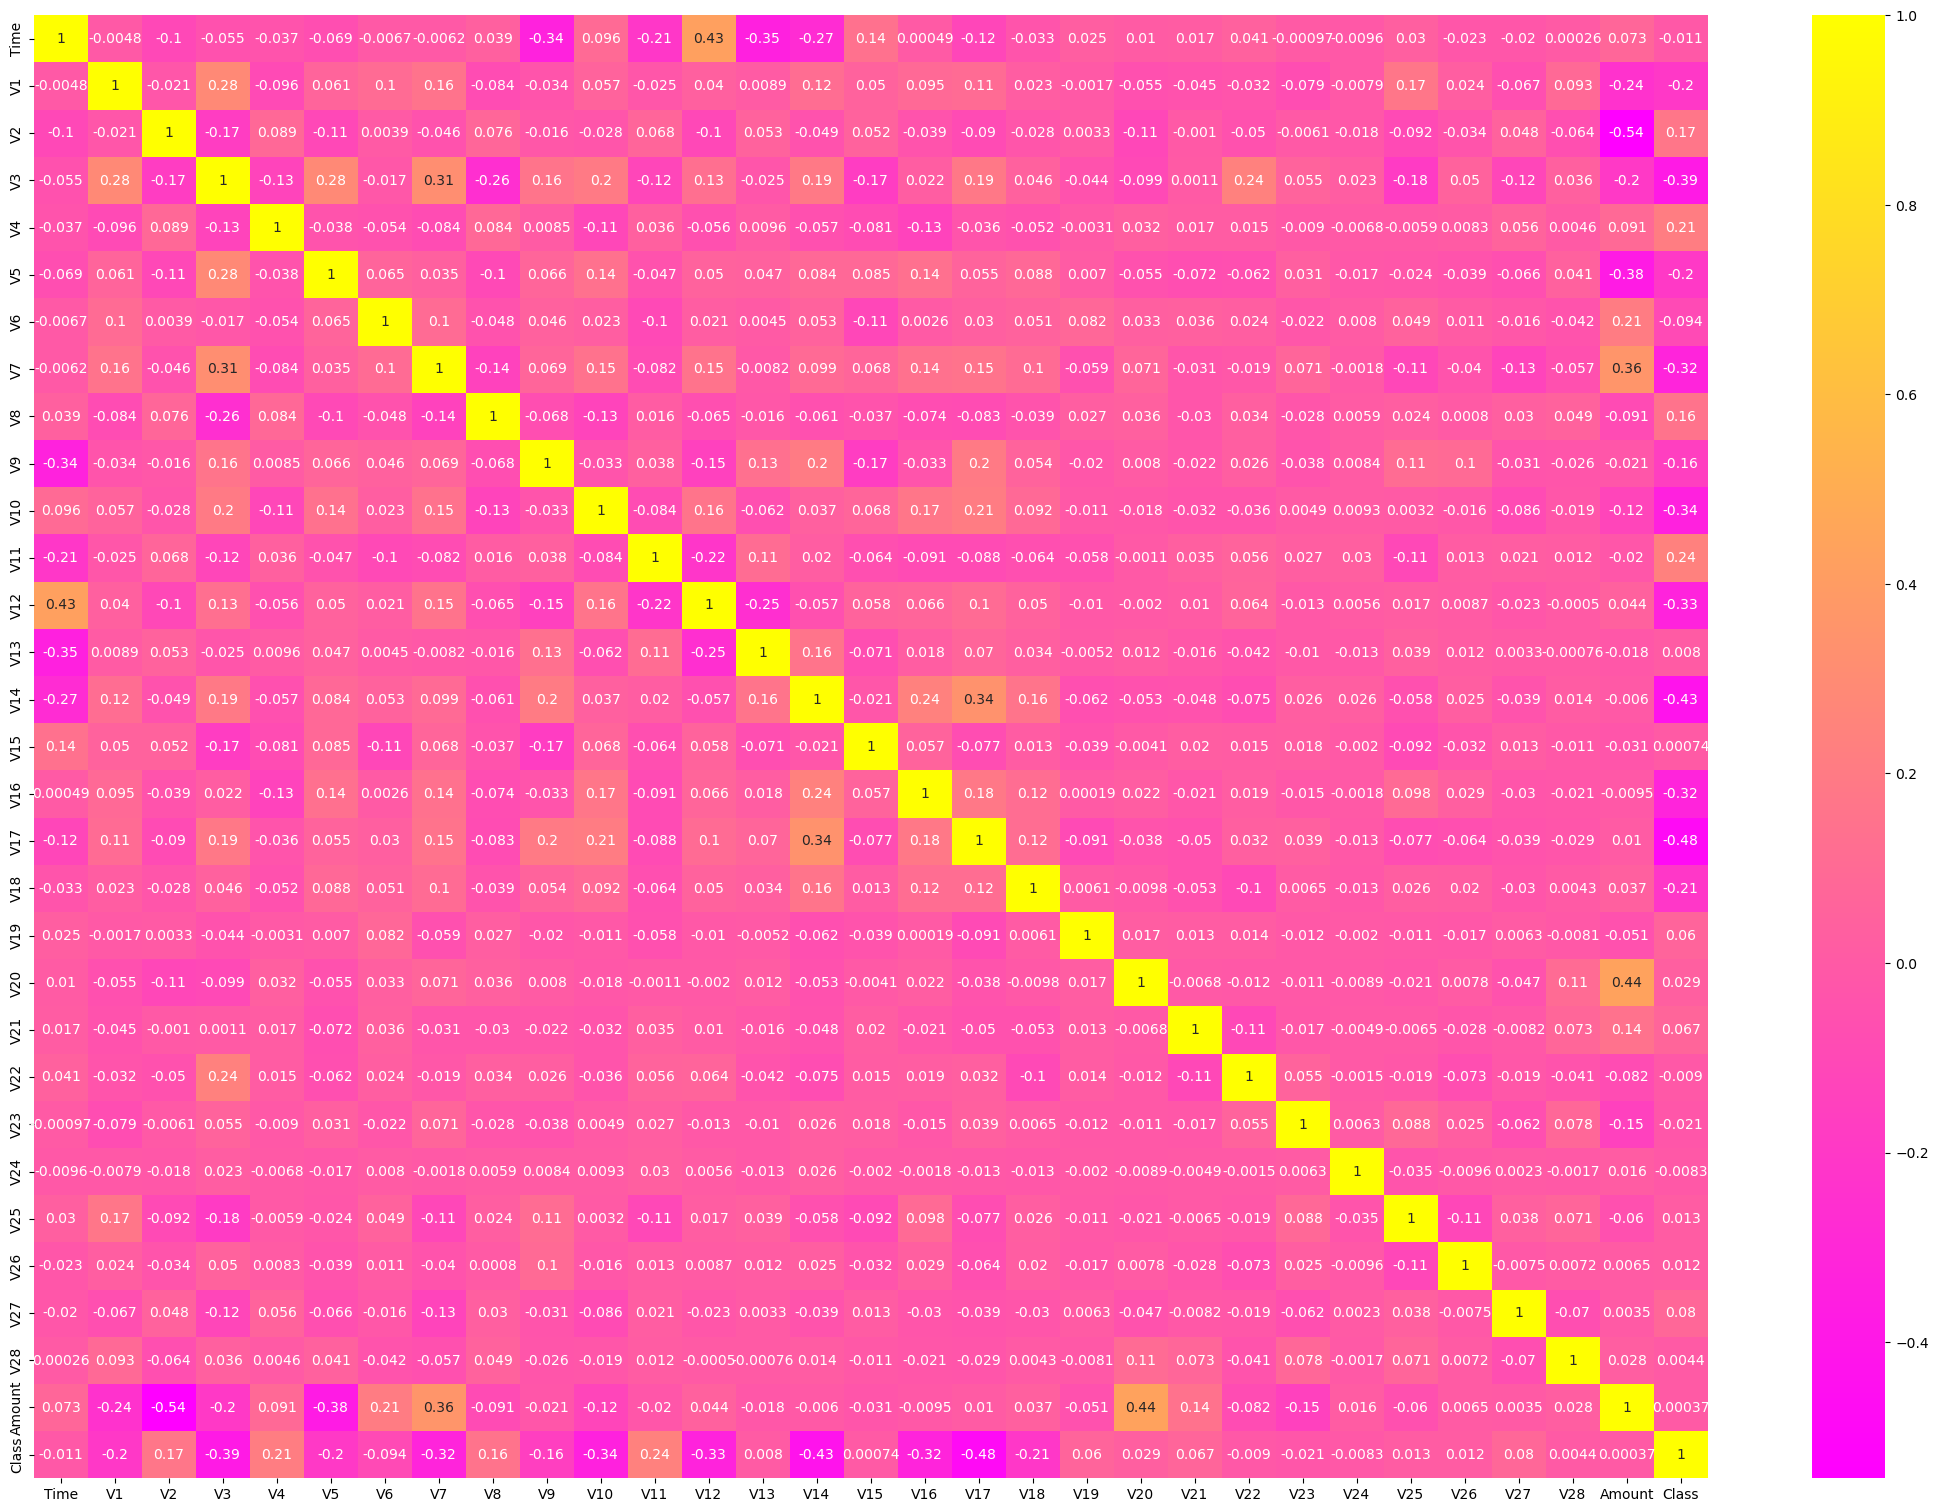

In [174]:
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [175]:
# Separating legitimate and fraudulent transactions

legit = cc[cc.Class == 0]
fraud = cc[cc.Class == 1]

In [176]:
# Descriptive statistics
print("Legit transaction amount stats:\n", legit.Amount.describe())

Legit transaction amount stats:
 count    54844.000000
mean        94.596767
std        257.114612
min          0.000000
25%          7.680000
50%         25.770000
75%         86.700000
max      12910.930000
Name: Amount, dtype: float64


In [177]:
print("\nFraudulent transaction amount stats:\n", fraud.Amount.describe())


Fraudulent transaction amount stats:
 count     155.000000
mean       96.369355
std       228.789960
min         0.000000
25%         1.000000
50%         5.300000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [178]:
cc.groupby('Class').describe()

Time                                                                 \
         count          mean           std    min      25%      50%       75%   
Class                                                                           
0.0    54844.0  30437.692619  13384.407613    0.0  24413.0  34580.0  40601.25   
1.0      155.0  27712.638710  13183.139483  406.0  16502.0  28658.0  41175.50   

                     V1            ...       V28              Amount  \
           max    count      mean  ...       75%        max    count   
Class                              ...                                 
0.0    46724.0  54844.0 -0.222633  ...  0.076167  33.847808  54844.0   
1.0    46149.0    155.0 -7.389710  ...  0.449809   1.130625    155.0   

                                                                 
            mean         std  min   25%    50%    75%       max  
Class                                                            
0.0    94.596767  257.114612  0.0  7.68  25.77  86.70  12910.93  
1.0    96.369355  228.789960  0.0  1.00   5.30  99.99   1809.68  

[2 rows x 240 columns]

In [179]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,30437.692619,-0.222633,-0.017149,0.722299,0.160788,-0.244234,0.108038,-0.096183,0.044509,0.095545,...,0.046420,-0.031476,-0.106691,-0.038331,0.007564,0.134630,0.020226,0.002242,0.004070,94.596767
1.0,27712.638710,-7.389710,5.282945,-9.990791,5.740546,-5.466601,-2.217791,-7.789627,3.581963,-3.471043,...,0.452907,0.886922,-0.214415,-0.276164,-0.085883,0.239727,0.129604,0.585060,0.031219,96.369355


## Balancing the Dataset

In [180]:
normal_sample = legit.sample(n=492)

In [181]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0)

In [182]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32881,37002.0,1.202909,0.620439,0.297607,2.310976,0.405780,0.169005,0.180087,-0.023645,-0.856802,...,0.005727,0.068965,-0.097794,-0.456913,0.587400,0.098276,0.003067,0.010944,0.00,0.0
442,322.0,1.202007,0.108213,0.591724,0.566079,-0.641573,-0.816974,-0.127403,0.004375,-0.026148,...,-0.207683,-0.703844,0.165350,0.493736,0.114822,0.068947,-0.041350,0.008041,1.79,0.0
40444,40242.0,1.231649,0.050397,0.103871,0.561442,-0.282182,-0.726395,0.080918,-0.184688,0.166313,...,0.027488,0.029151,-0.166120,-0.078142,0.562430,0.457466,-0.045292,0.011429,39.93,0.0
7882,10951.0,1.171716,-0.094357,0.960922,0.267190,-0.907105,-0.629010,-0.543630,-0.053474,1.506755,...,0.000564,0.189459,-0.006658,0.557558,0.136481,1.000646,-0.096673,-0.001258,24.95,0.0
53138,45829.0,-1.278298,-0.399160,2.072460,-0.235541,-0.806329,0.696113,1.119854,-0.057881,0.471416,...,-0.164732,-0.116475,0.246727,0.033729,-0.043867,0.210305,-0.110468,-0.175771,252.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52466,45463.0,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,-1.213040,...,1.186036,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1.00,1.0
52521,45501.0,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,...,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1.0
52584,45541.0,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,...,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1.0
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1.0


In [183]:
  new_dataset['Class'].value_counts()

Class
0.0    492
1.0    155
Name: count, dtype: int64

In [184]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,30609.286585,-0.23524,0.052537,0.699782,0.185376,-0.296501,0.081618,0.017944,0.071400,0.040742,...,0.079867,-0.047373,-0.120433,-0.061858,-0.024478,0.125084,0.066818,-0.000456,-0.006922,108.818130
1.0,27712.638710,-7.38971,5.282945,-9.990791,5.740546,-5.466601,-2.217791,-7.789627,3.581963,-3.471043,...,0.452907,0.886922,-0.214415,-0.276164,-0.085883,0.239727,0.129604,0.585060,0.031219,96.369355


In [185]:
# Creating a time-based derived column
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')

# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)

# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [186]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
32881,1.202909,0.620439,0.297607,2.310976,0.405780,0.169005,0.180087,-0.023645,-0.856802,0.647245,...,0.068965,-0.097794,-0.456913,0.587400,0.098276,0.003067,0.010944,0.00,0.0,10
442,1.202007,0.108213,0.591724,0.566079,-0.641573,-0.816974,-0.127403,0.004375,-0.026148,0.142131,...,-0.703844,0.165350,0.493736,0.114822,0.068947,-0.041350,0.008041,1.79,0.0,0
40444,1.231649,0.050397,0.103871,0.561442,-0.282182,-0.726395,0.080918,-0.184688,0.166313,-0.035720,...,0.029151,-0.166120,-0.078142,0.562430,0.457466,-0.045292,0.011429,39.93,0.0,11
7882,1.171716,-0.094357,0.960922,0.267190,-0.907105,-0.629010,-0.543630,-0.053474,1.506755,-0.347083,...,0.189459,-0.006658,0.557558,0.136481,1.000646,-0.096673,-0.001258,24.95,0.0,3
53138,-1.278298,-0.399160,2.072460,-0.235541,-0.806329,0.696113,1.119854,-0.057881,0.471416,-0.660257,...,-0.116475,0.246727,0.033729,-0.043867,0.210305,-0.110468,-0.175771,252.13,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52466,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,-1.213040,-2.975267,...,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1.00,1.0,12
52521,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,...,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1.0,12
52584,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,-2.755797,...,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1.0,12
53591,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1.0,12


## Features (X) and Labels (y)

In [187]:
x = new_dataset.drop('Class', axis=1)

In [188]:
y = new_dataset['Class']

In [189]:
x.shape

(647, 30)

In [190]:
y.shape

(647,)

In [191]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)


In [192]:
cols = list(x.columns.values)

## Visualizing features for normal vs fraud transactions

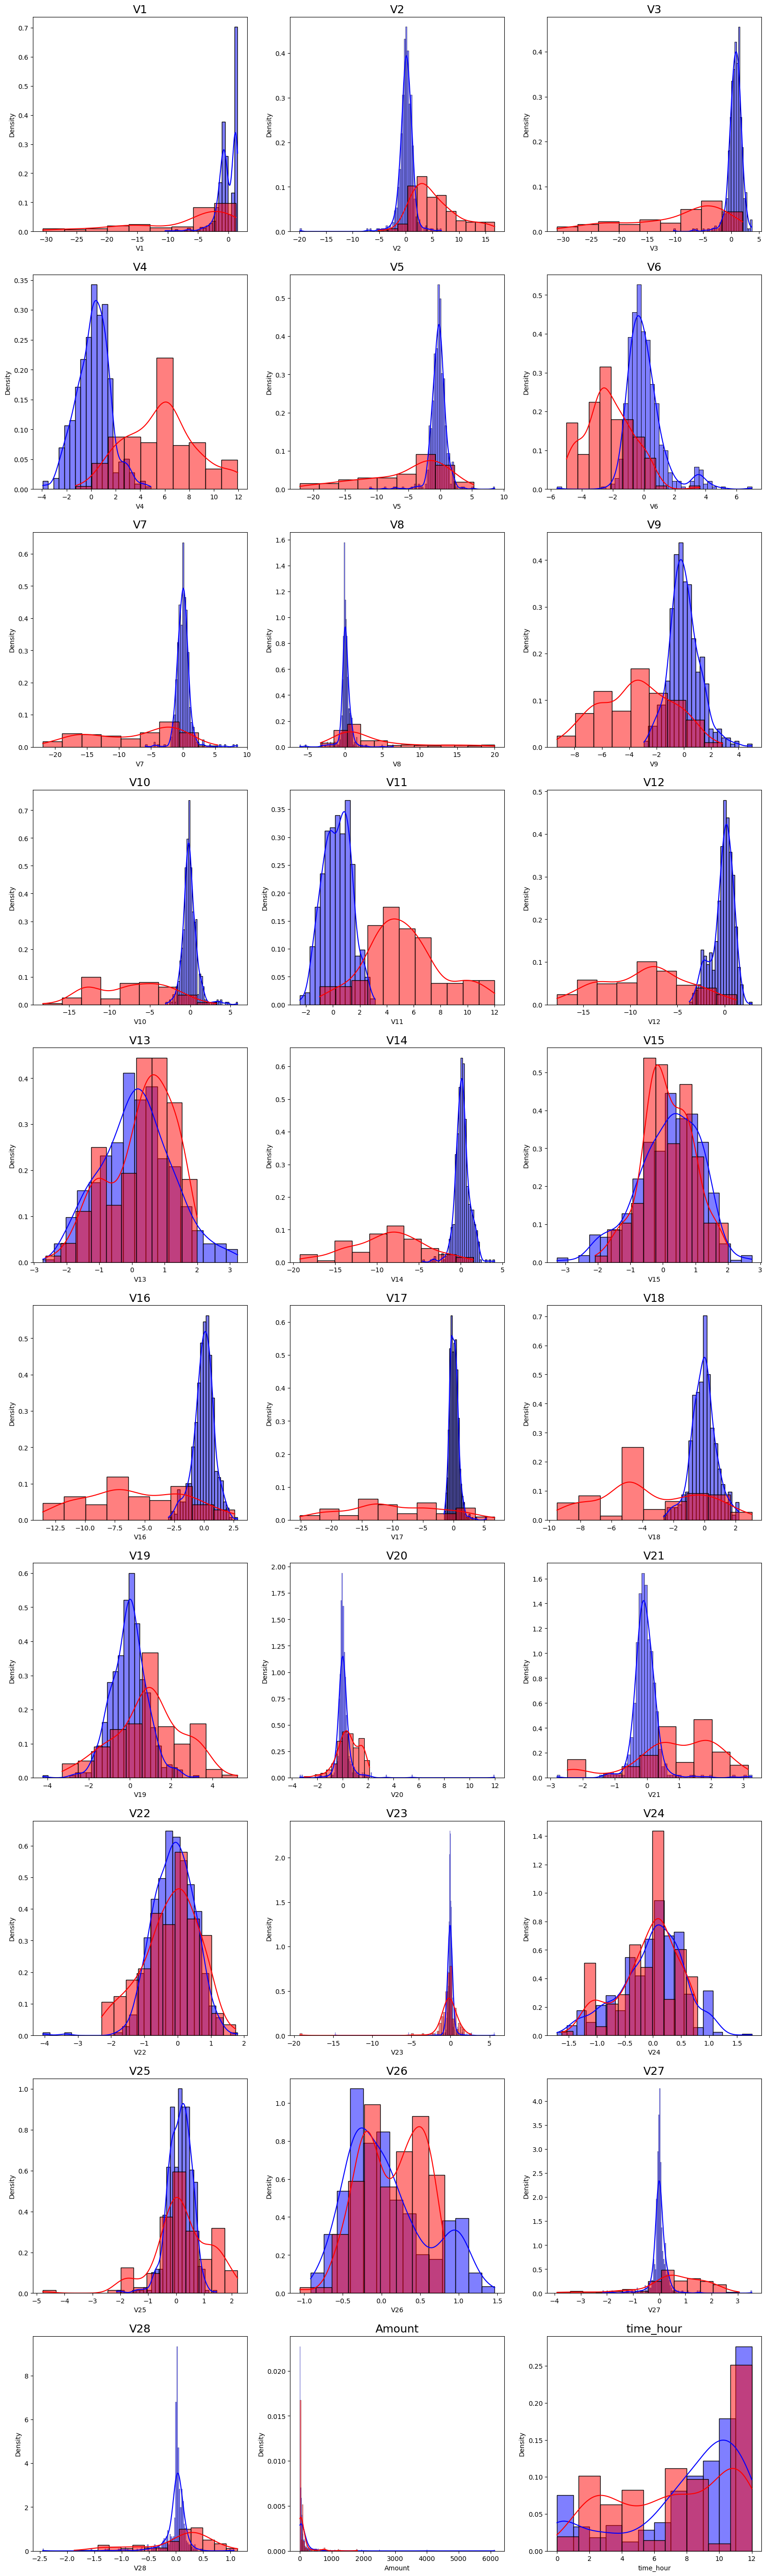

In [193]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [194]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**MODEL TRAINING AND TESTING**

In [195]:
#List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Ensure x_train and x_test are in C-contiguous format
x_train = np.ascontiguousarray(x_train)
x_test = np.ascontiguousarray(x_test)


Model: Logistic Regression
Accuracy: 0.9691
Precision: 0.9250
Recall: 0.9487

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       123
         1.0       0.93      0.95      0.94        39

    accuracy                           0.97       162
   macro avg       0.95      0.96      0.96       162
weighted avg       0.97      0.97      0.97       162



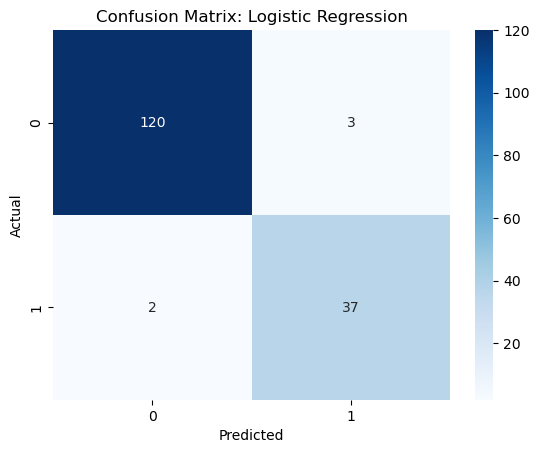


Model: Decision Tree
Accuracy: 0.9259
Precision: 0.7872
Recall: 0.9487

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       123
         1.0       0.79      0.95      0.86        39

    accuracy                           0.93       162
   macro avg       0.88      0.93      0.91       162
weighted avg       0.94      0.93      0.93       162



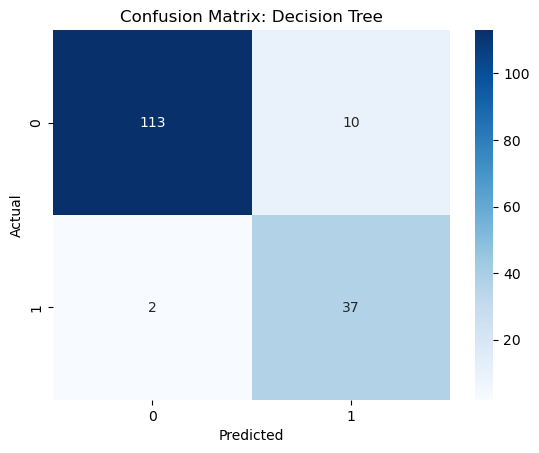


Model: Random Forest
Accuracy: 0.9877
Precision: 1.0000
Recall: 0.9487

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.95      0.97        39

    accuracy                           0.99       162
   macro avg       0.99      0.97      0.98       162
weighted avg       0.99      0.99      0.99       162



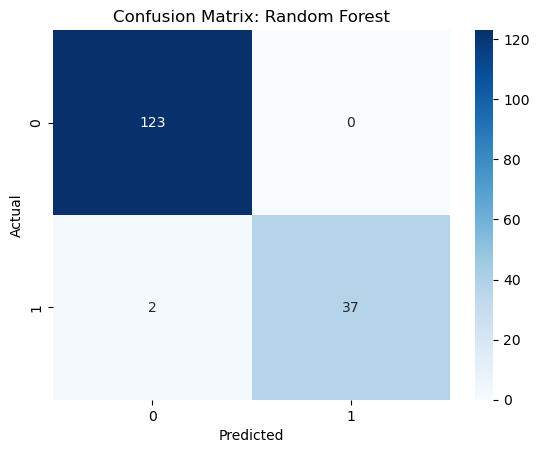


Model: K-Nearest Neighbors
Accuracy: 0.9815
Precision: 1.0000
Recall: 0.9231

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.92      0.96        39

    accuracy                           0.98       162
   macro avg       0.99      0.96      0.97       162
weighted avg       0.98      0.98      0.98       162



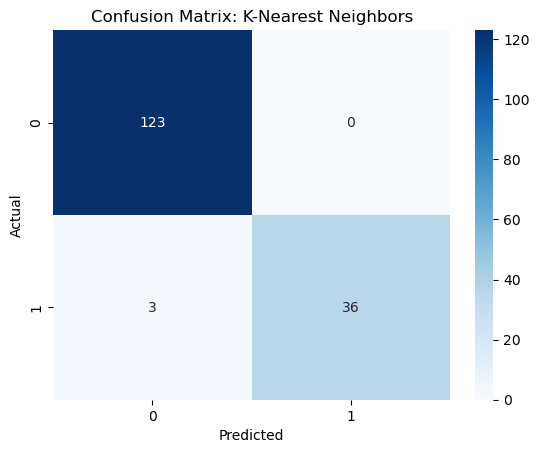


Model: Support Vector Machine
Accuracy: 0.8827
Precision: 1.0000
Recall: 0.5128

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       123
         1.0       1.00      0.51      0.68        39

    accuracy                           0.88       162
   macro avg       0.93      0.76      0.80       162
weighted avg       0.90      0.88      0.87       162



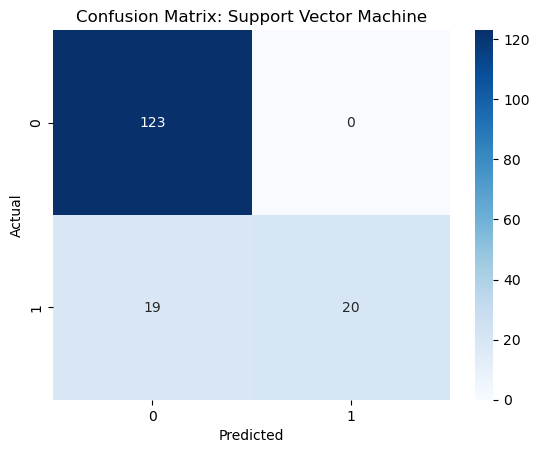

In [196]:
# Training, testing, and evaluating each model

for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predictions on test set
    y_pred = model.predict(x_test)
    
    # Accuracy, Precision, Recall
    acc_score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy: {acc_score:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

### Model Accuracy Comparison

In [197]:
# Comparing all model accuracies visually
model_names = list(models.keys())
model_accuracies = []

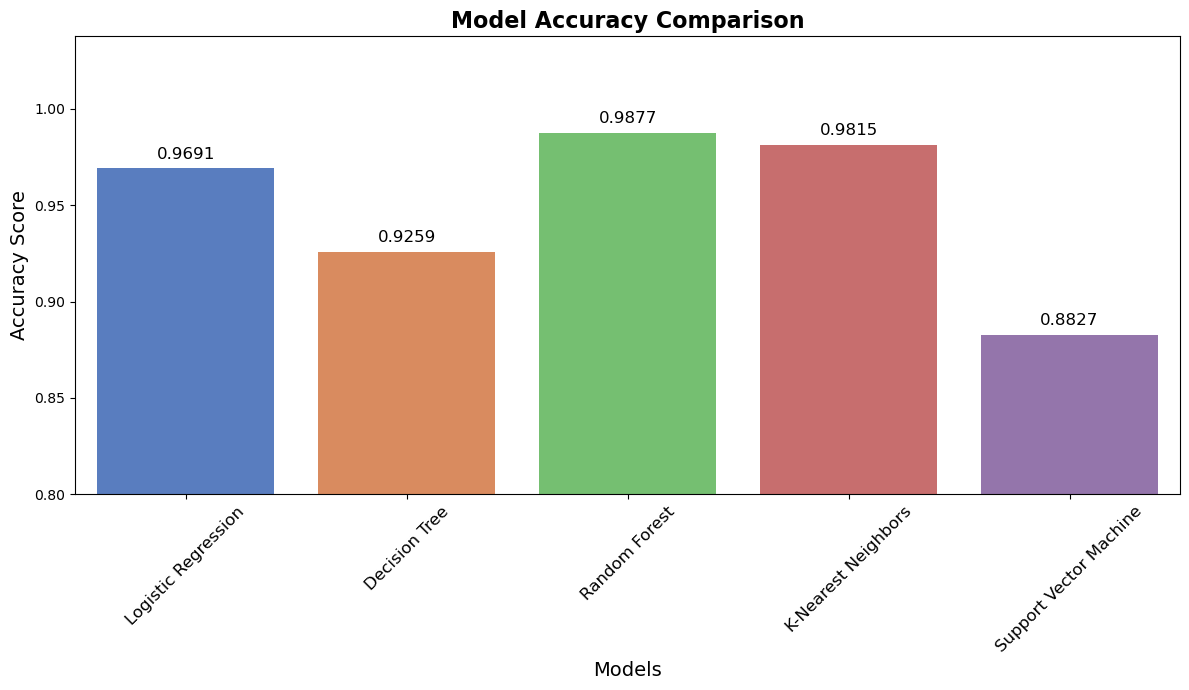

In [198]:
# Calculate the accuracy for each model
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies.append(acc)

# Create the plot
plt.figure(figsize=(12,7))

# Plotting the accuracies
sns.barplot(x=model_names, y=model_accuracies)

# Adding a title and labels
plt.title('Model Accuracy Comparison', fontsize=16, weight='bold')
plt.ylabel('Accuracy Score', fontsize=14)
plt.xlabel('Models', fontsize=14)

# Set y-axis to start from 0.80 for better comparison
plt.ylim(0.80, max(model_accuracies) + 0.05)

# Add accuracy values on top of the bars for better clarity
for index, acc in enumerate(model_accuracies):
    plt.text(index, acc + 0.005, f'{acc:.4f}', ha='center', fontsize=12)

# Adjusting the x-tick labels and making sure they're readable
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()

plt.show()